<a href="https://colab.research.google.com/github/OckerGui/DataScience/blob/master/Custom_Keras_API_Project_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras API Project Exercise**

The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.



----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

**Imports for data manipulation and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"



---
## **Data Viz - Exploratory analysis**

 * **Label Analisys and Loan amount**

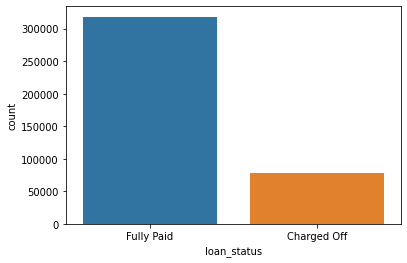

In [0]:
sns.countplot(df['loan_status'])

With this imbalance on the label, which is somewhat common on classification problems on spam or fraud detection, the accuracy is going to be naturaly very high, but the true metric to look upon for evaluation of this model are Recall and F1 scores to check for TP and TF.

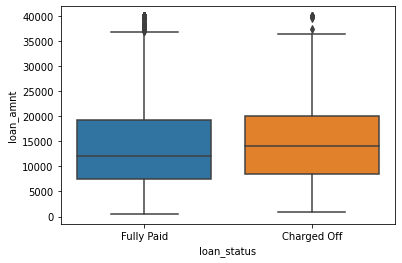

In [0]:
sns.boxplot('loan_status', 'loan_amnt', data=df)

In [0]:
df.groupby('loan_status')['loan_amnt'].describe().reset_index()

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
1,Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Need to add a dummy for Label 'loan_status'

In [0]:
df['loan_paid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [0]:
df.corr()['loan_paid'].sort_values(ascending=True)

revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_paid               1.000000
Name: loan_paid, dtype: float64

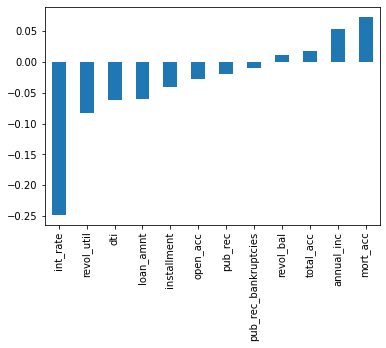

In [0]:
df.corr()['loan_paid'].sort_values(ascending=True)[:12].plot(kind='bar')

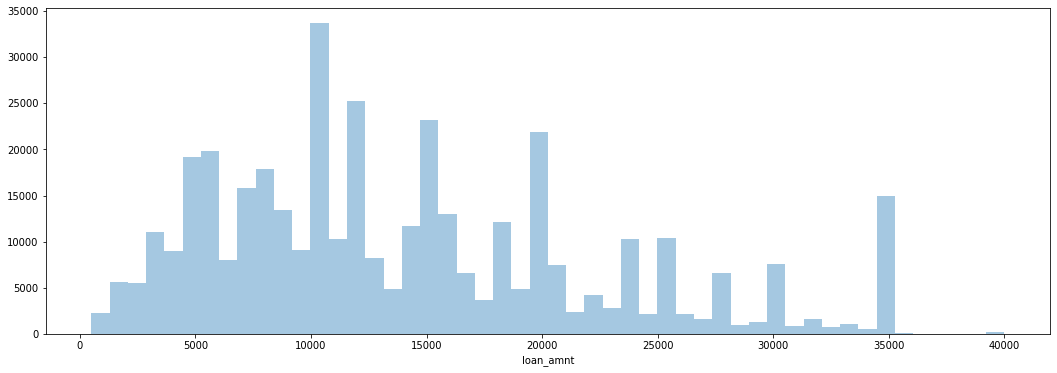

In [0]:
plt.figure(figsize=(18,6))
sns.distplot(df['loan_amnt'], kde=False)


---

* **Correlation analysis**

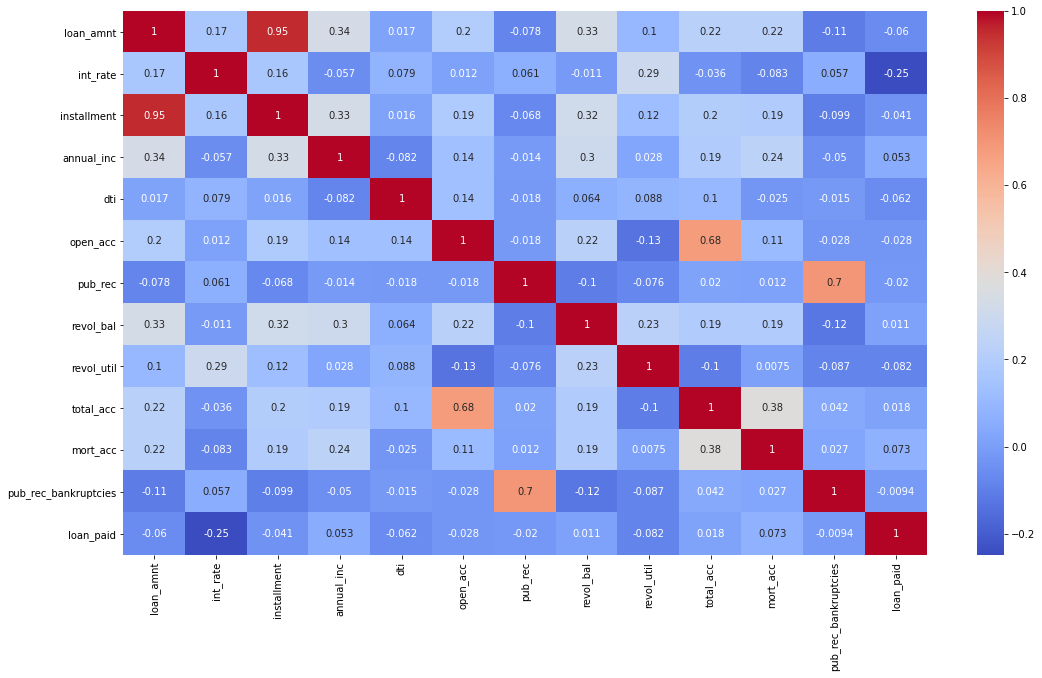

In [0]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm')

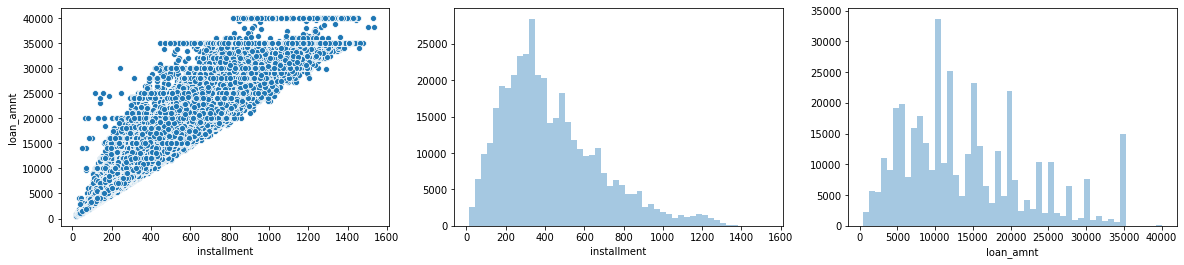

In [0]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(20,4)

sns.scatterplot(x='installment',y='loan_amnt', data=df, ax=ax[0])
sns.distplot(df['installment'], kde=False,ax=ax[1])
sns.distplot(df['loan_amnt'], kde=False,ax=ax[2])

fig.show()

Installment and Loan ammount represent the same variable in different ways (almost perfect correlation) - need to drop one of those

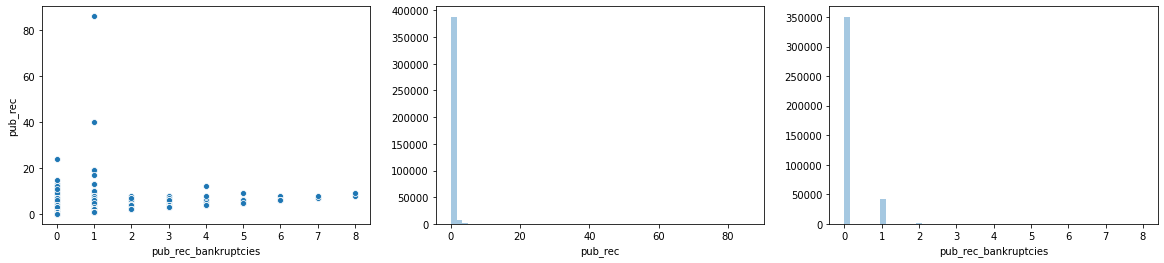

In [0]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(20,4)

sns.scatterplot(x='pub_rec_bankruptcies',y='pub_rec', data=df,ax=ax[0])
sns.distplot(df['pub_rec'], kde=False,ax=ax[1])
sns.distplot(df['pub_rec_bankruptcies'], kde=False,ax=ax[2])

fig.show()

Are those variables bad to the model if left that way? They pretty much say similar things towards the domain.

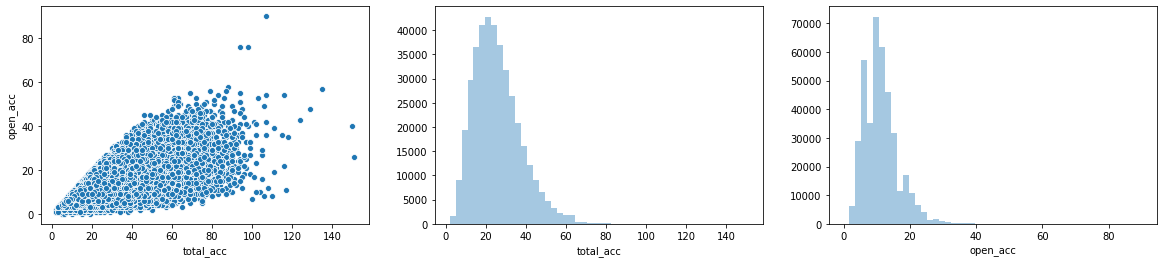

In [0]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(20,4)

sns.scatterplot(x='total_acc',y='open_acc', data=df,ax=ax[0])
sns.distplot(df['total_acc'], kde=False,ax=ax[1])
sns.distplot(df['open_acc'], kde=False,ax=ax[2])

fig.show()

Same thing for those 2, highly correlated and say very similar things for the domain

---
* **Categorical Features analysis - Text/Object types and Missing values analysis**





In [0]:
df.columns.to_series().groupby(df.dtypes).groups
#df.select_dtypes(exclude='float').head()
#df.dtypes

{dtype('int64'): Index(['loan_paid'], dtype='object'),
 dtype('float64'): Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 dtype('O'): Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
        'home_ownership', 'verification_status', 'issue_d', 'loan_status',
        'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
        'application_type', 'address'],
       dtype='object')}

In [5]:
df.notna().count()-df.count()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

In [9]:
100*df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_paid               0.000000
dtype: float64


* **Grade and Subgrade feature analysis**




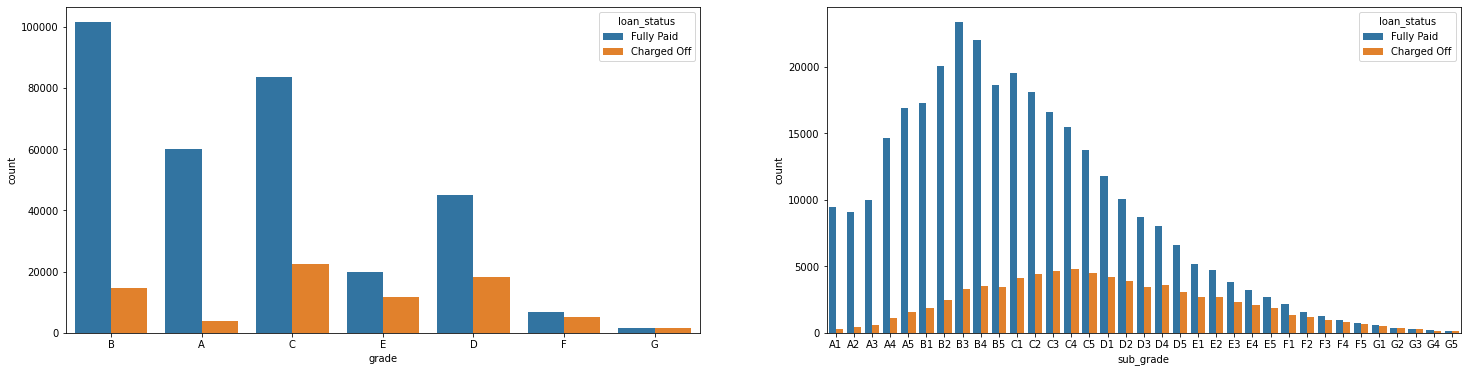

In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(25,6)

sns.countplot(df['grade'], hue='loan_status', data= df,ax=ax[0])
sns.countplot(df['sub_grade'].sort_values(), hue='loan_status', data= df,ax=ax[1])

fig.show()

Closer look on the worst subgrades distribution ['E','F','G']

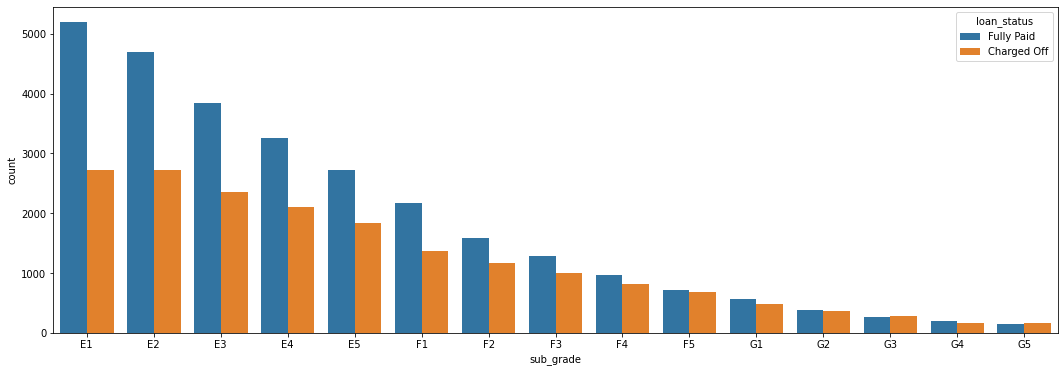

In [0]:
plt.figure(figsize=(18,6))
sns.countplot(df[df['grade'].isin(['E','F','G'])]['sub_grade'].sort_values(), hue='loan_status', data= df)

Good correlation, going to check how to dummy it

**loan_status** - Good value - Need to convert to number

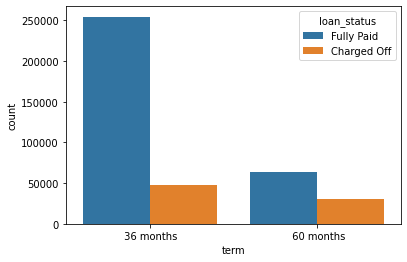

In [0]:
sns.countplot('term', hue='loan_status', data=df)

**emp_title** - Too many unique with too many null values - Probably going to drop it - Could do an extensive feat engi work to classificate those titles relatively to paying grades or such information (high/medium/low income jobs) to minimize the amount of dummies variable.

In [0]:
print(df['emp_title'].value_counts())
print('Missing values: ', df['emp_title'].isna().sum())

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
CHC of Snohomish County              1
S&W Wilson Enterprises INC.          1
I LOVE SUSHI                         1
1 Source Material Handling LLC       1
Vice President/Branch Sale MGR       1
Name: emp_title, Length: 173105, dtype: int64
Missing values:  22927


**emp_length** - not that relevant for the model and has missing values, going to drop it.

In [0]:
print(df['emp_length'].value_counts().sort_index())
print('Missing values: ', df['emp_length'].isna().sum())

1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: emp_length, dtype: int64
Missing values:  18301


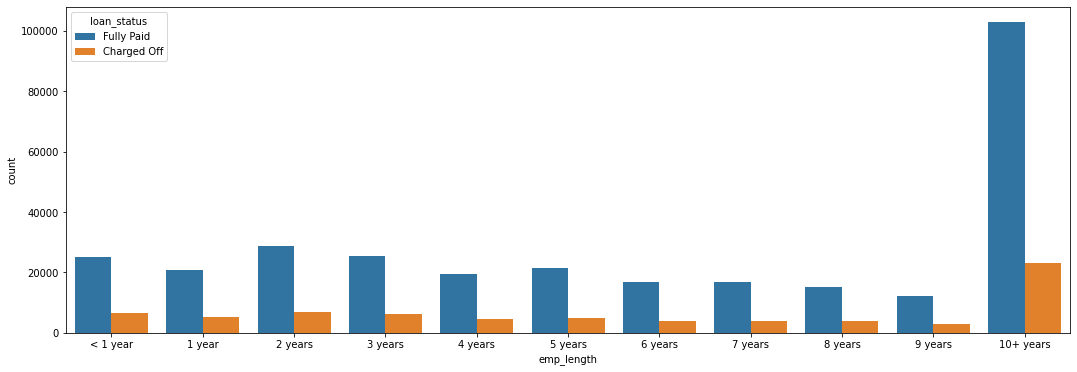

In [0]:
#sorted_index = df['emp_length'].value_counts().sort_index()
sorted_index = ['< 1 year', '1 year',  '2 years', '3 years', '4 years', '5 years','6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(18,6))
sns.countplot('emp_length', hue='loan_status', data=df, order=sorted_index)

In [0]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

Need to see the if the amount of unpaid debt represent anything in the distribution on employement length - **Group by + Unstack**

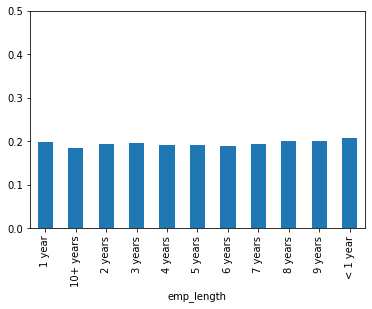

In [0]:
group = df.groupby(by=['loan_status','emp_length'])['loan_amnt'].count().unstack(0)
(group['Charged Off']/(group['Fully Paid']+group['Charged Off'])).plot(kind='bar',ylim=(0,0.5))

The amount of umpaid debt is about the same over all the employements values, so looks like it doesn't help our model.

**title and purpose columns** - The title feature have many missing values and looks already represented on the Purpose feature. Going to **drop the title feature** and take a better look on Purpose feature

In [0]:
print(df['title'].value_counts())
print('------------------------')
print(df['purpose'].value_counts())

Debt consolidation                          152472
Credit card refinancing                      51487
Home improvement                             15264
Other                                        12930
Debt Consolidation                           11608
                                             ...  
Empowering my $ by Consolidation                 1
Jose's loan                                      1
consolidating the last of my credit card         1
No More Plastic                                  1
Great Credit Card Payoff                         1
Name: title, Length: 48817, dtype: int64
------------------------
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         

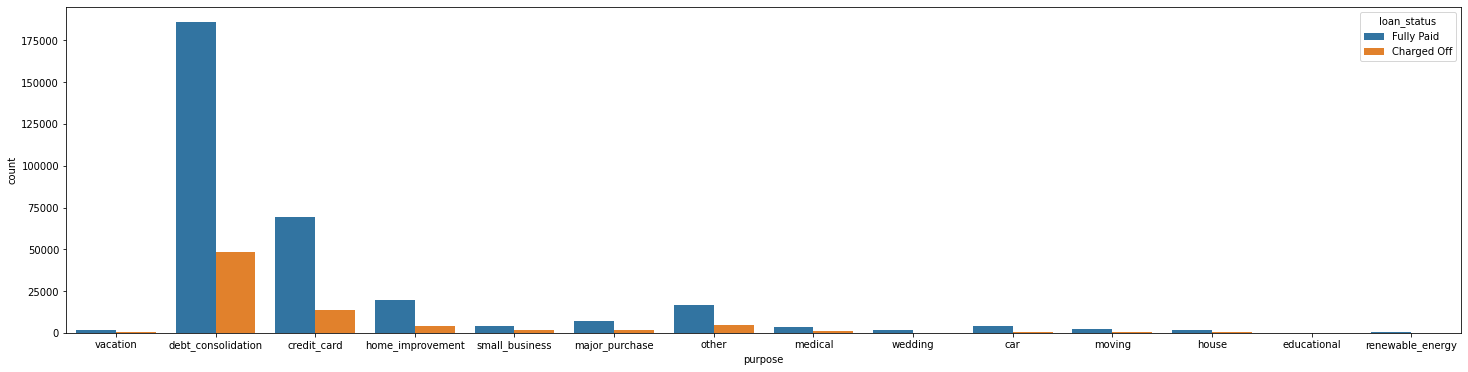

In [0]:
plt.figure(figsize=(25,6))
sns.countplot('purpose', hue='loan_status', data=df)

Looks good info for the model

**mort_acc** - Some NA values - need to fill those

NA values for mort_acc:  37795


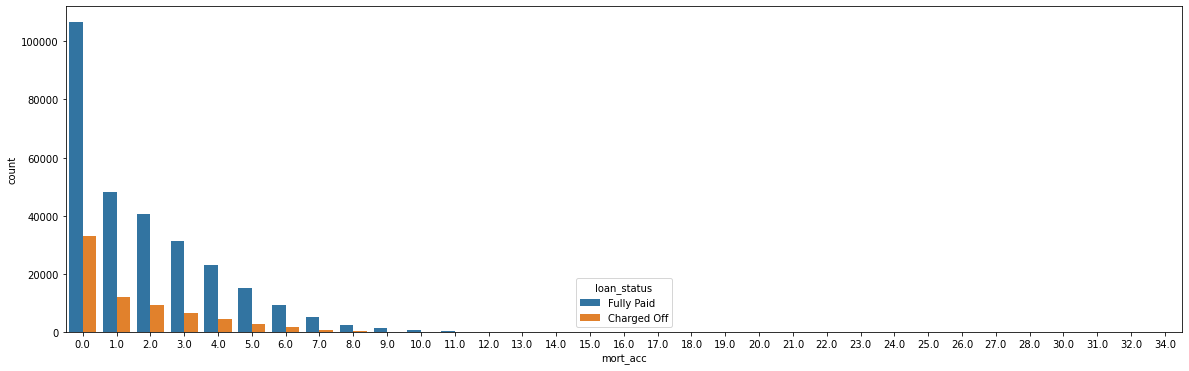

In [0]:
print('NA values for mort_acc: ', df['mort_acc'].isnull().sum())
plt.figure(figsize=(20,6))
sns.countplot('mort_acc', hue='loan_status', data=df)

In [0]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_paid               0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Could use the correlated total_acc feature to create values for those NAs on mort_acc

In [0]:
total_acc_mean = df.groupby('total_acc').mean()['mort_acc']

In [0]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [0]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [13]:
print('NA values for mort_acc: ', df['mort_acc'].isnull().sum())

NA values for mort_acc:  0


**revol_util and pub_rec_bankruptcies** - These 2 features have a very small amount of NA values - going to find those rows and delete then from the dataset

In [14]:
print('NA values for revol_util: ', df['revol_util'].isnull().sum())
print('NA values for pub_rec_bankruptcies: ', df['pub_rec_bankruptcies'].isnull().sum())

NA values for revol_util:  276
NA values for pub_rec_bankruptcies:  535


# **Cleaning the Data**

In [15]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

In [0]:
df.drop(['emp_title'], axis = 1, inplace=True) # Too many unique values and many missing values too
df.drop(['emp_length'], axis = 1, inplace=True) # Zeroed correlation with the label, many missing values

df.drop(['title'], axis = 1, inplace=True) # Some missing values and its values are already representaded by the purpose feature

df.drop(['grade'], axis = 1, inplace=True) # Part of the subgrade feature

df.drop('issue_d',axis = 1, inplace=True) # Date where the loan was issued - not relevant for the model


In [0]:
df = df.dropna() # Clean NA rows from revol_util and pub_rec_bankruptcies

In [18]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_paid               0
dtype: int64

**home_ownership** - Need to clean off those low representative categories - None and Any get summed up to Other

In [19]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [0]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)



---
# **Adding dummy variables**


In [0]:
df.select_dtypes(exclude='float').columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address', 'loan_paid'],
      dtype='object')

**term** - Clean it from the string 'months' and convert to numerical

In [0]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [0]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

**sub_grade** - Need to convert to dummy variables

In [0]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [0]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_paid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

**verification_status, application_type,initial_list_status,purpose** - Dummy extract on those features

In [0]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

**earliest_cr_line** - Historical data - could be relevant for the model - extract the year of it

In [0]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

**address** - Extract the zipcode from it and extract dummies

In [0]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [28]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

KeyError: ignored

In [29]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [0]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_paid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,earliest_cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1990,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2004,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2007,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2006,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1999,0,1,0,0,0,0,0,0,0


# **Model construction**

* **Train test split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df = df.drop('loan_status',axis=1)

In [0]:
X = df.drop('loan_paid',axis=1).values
y = df['loan_paid'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

* **Normalizing the Data** - Using a scaler to normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* **Creating the model**

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

Fist layer, neurons equal to the number of features, and doing 3 layers with half the neurons of the previously layer, and adding dropouts for each layer

In [0]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2988 - val_loss: 0.2646
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2655 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2630 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2619 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2607 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2602 - val_loss: 0.2612
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2596 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2596 - val_loss: 0.2611
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.259

* **saving the model** 

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('full_data_project_model.h5')  

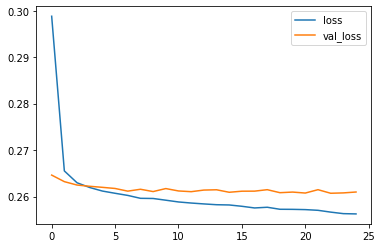

In [39]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = model.predict_classes(X_test)
print('classification report:')
print(classification_report(y_test,predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions))

classification report:
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

Confusion matrix:
[[ 6788  8870]
 [   48 63338]]


Raising the number of layers and rerunning the model to see if f1 inproves

In [0]:
model2 = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model2.add(Dense(78,  activation='relu'))
model2.add(Dropout(0.2))

# hidden layer
model2.add(Dense(39, activation='relu'))
model2.add(Dropout(0.2))

# hidden layer
model2.add(Dense(19, activation='relu'))
model2.add(Dropout(0.2))

# New hidden layer
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.3))

# output layer
model2.add(Dense(units=1,activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [58]:
model2.fit(x=X_train, 
          y=y_train, 
          epochs=80,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3441 - val_loss: 0.2652
Epoch 2/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2817 - val_loss: 0.2643
Epoch 3/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2729 - val_loss: 0.2634
Epoch 4/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2694 - val_loss: 0.2631
Epoch 5/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2679 - val_loss: 0.2626
Epoch 6/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2669 - val_loss: 0.2619
Epoch 7/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2664 - val_loss: 0.2627
Epoch 8/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2660 - val_loss: 0.2627
Epoch 9/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2659 - val_loss: 0.2622
Epoch 10/80
1236/1236 [==============================] - 4s 3ms/step - loss: 0.265

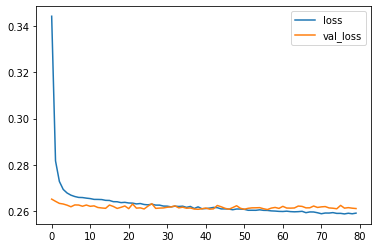

In [59]:
losses = pd.DataFrame(model2.history.history)
losses[['loss','val_loss']].plot()

In [61]:
predictions = model2.predict_classes(X_test)
print('classification report:')
print(classification_report(y_test,predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions))

classification report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.78     79044
weighted avg       0.90      0.89      0.87     79044

Confusion matrix:
[[ 7115  8543]
 [  323 63063]]
